In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import re
import sys 
import statsmodels.stats.multitest
#sys.path.append('C:\\Users\\brittany\\henderson\\GitHub\\GBM_for_CPTAC\\')
#import cis_functions as f
#sys.path.append('C:\\Users\\Lindsey\\Documents\\GitHub\\WhenMutationsDontMatter\\')
#import plot_utils as p


import cptac
import cptac.utils as u

cptac warning: Your version of cptac (0.7.0) is out-of-date. Latest is 0.7.1. Please run 'pip install --upgrade cptac' to update it. (/Users/Lindsey/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py, line 15)


In [44]:
df = pd.read_csv("pancan_EGFR_pearson.csv")
df = df.drop(['Unnamed: 0'], axis=1)
#filtered_data = df[df["Comparison"]== "ARG1"]
df["SD_Correlation"] = (df.loc[:,["Correlation_Gbm","Correlation_kidney","Correlation_Ovar","Correlation_Brca","Correlation_Luad","Correlation_hnscc","Correlation_colon"]].std(axis = 1))
df["Average_Correlation"] = (df.loc[:,["Correlation_Gbm","Correlation_kidney","Correlation_Ovar","Correlation_Brca","Correlation_Luad","Correlation_hnscc","Correlation_colon"]].mean(axis = 1))
df["SD_Pval"] = df.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon"]].std(axis = 1)
df["Average_Pval"] = df.loc[:,["P_value_Gbm","P_value_kidney","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon"]].mean(axis = 1)
df= df.dropna(thresh = 14)
df

,Comparison,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Endo,P_value_Endo,Correlation_Ovar,P_value_Ovar,Correlation_Brca,...,Correlation_Luad,P_value_Luad,Correlation_hnscc,P_value_hnscc,Correlation_colon,P_value_colon,SD_Correlation,Average_Correlation,SD_Pval,Average_Pval
0,EGFR_proteomics,1.000000,0.000000e+00,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,0.000000e+00,1.000000,0.000000,1.281975e-16,1.000000,0.000000,0.000000
1,GRB2_proteomics,-0.610889,1.886384e-11,-0.217427,0.022506,-0.437336,0.000009,-0.190090,0.085202,-0.177379,...,-0.302439,0.001321,-0.532341,2.559824e-09,0.150960,0.139949,2.519922e-01,-0.268515,0.053623,0.043840
3,SHC1_proteomics,-0.540524,7.695118e-09,-0.102065,0.288685,-0.208383,0.042716,0.175098,0.113358,0.090908,...,-0.135844,0.262164,-0.085910,3.744159e-01,0.203250,0.045855,2.537561e-01,-0.056441,0.147934,0.202629
4,WAS_proteomics,-0.501918,1.205168e-07,-0.279814,0.003071,-0.238306,0.020041,-0.090413,0.416288,0.153496,...,-0.337909,0.000306,-0.503427,2.411333e-08,0.282401,0.005070,3.098791e-01,-0.182512,0.154958,0.075171
5,NPC2_proteomics,-0.498791,1.484249e-07,-0.319133,0.000678,0.026214,0.800915,-0.183193,0.097375,0.279599,...,0.292520,0.001928,-0.073050,4.503201e-01,0.040840,0.691234,2.956795e-01,-0.065887,0.279584,0.177716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1221,ABCC5_proteomics,NaN,NaN,-0.025235,0.911241,NaN,NaN,-0.233969,0.041930,-0.043209,...,0.189614,0.064268,0.254834,7.491295e-03,NaN,NaN,1.962806e-01,0.028407,0.433612,0.350676
1224,GNG10_proteomics,NaN,NaN,-0.001988,0.983552,NaN,NaN,-0.080171,0.471231,0.061879,...,-0.011259,0.907063,-0.092667,3.378709e-01,-0.003380,0.976108,5.704850e-02,-0.021264,0.289344,0.697838
1231,WNT2_proteomics,NaN,NaN,NaN,NaN,0.230992,0.024311,NaN,NaN,0.131722,...,-0.140640,0.213382,-0.178528,6.326197e-02,0.173942,0.088393,1.818541e-01,-0.003376,0.117157,0.170196
1253,PKN3_proteomics,NaN,NaN,NaN,NaN,0.141184,0.418522,-0.234579,0.032795,0.027018,...,-0.277707,0.004928,-0.052256,5.894382e-01,NaN,NaN,1.453455e-01,-0.134381,0.390360,0.350391


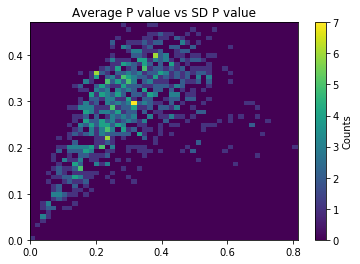

In [45]:
df1_subset = df[["Average_Pval","SD_Pval"]]
#df1_subset.columns = df1_subset.columns.droplevel(1)
#def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
df1_subset = df1_subset.dropna(axis=0, how="any")

x1 = df1_subset[["Average_Pval"]].values
y1 = df1_subset[["SD_Pval"]].values
x1 = x1[:,0]
y1 = y1[:,0]
plt.hist2d(x1,y1,bins=50)
plt.title("Average P value vs SD P value")
cbar = plt.colorbar()
cbar.ax.set_ylabel('Counts')
fig.set_size_inches(18.5, 10.5)

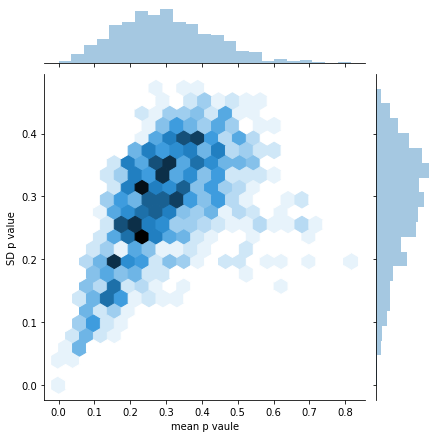

In [46]:
g = (sns.jointplot(x1, y1, kind="hex")
        .set_axis_labels("mean p vaule", "SD p value"))

plt.show()

Text(0.5, 1.0, 'Average Correlation vs SD Correlation')

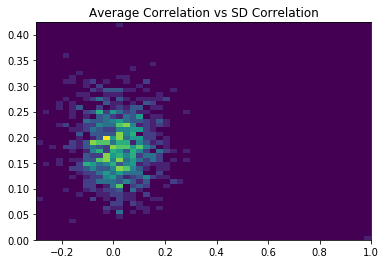

In [47]:
df1_subset = df[["Average_Correlation","SD_Correlation"]]
#df1_subset.columns = df1_subset.columns.droplevel(1)
#def create_lin_reg_graph(df1, df2, x_axis, y_axis, title):
df1_subset = df1_subset.dropna(axis=0, how="any")

x1 = df1_subset[["Average_Correlation"]].values
y1 = df1_subset[["SD_Correlation"]].values
x1 = x1[:,0]
y1 = y1[:,0]
plt.hist2d(x1,y1,bins=50)
plt.title("Average Correlation vs SD Correlation")


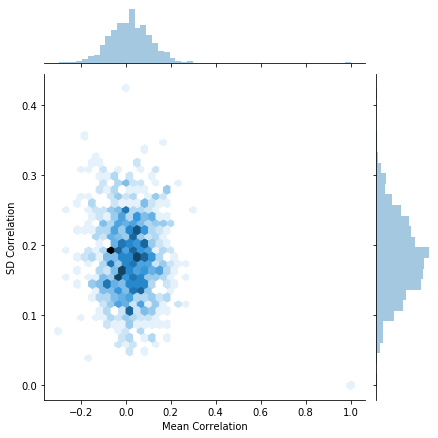

In [48]:
g = (sns.jointplot(x1, y1, kind="hex")
        .set_axis_labels("Mean Correlation", "SD Correlation"))

plt.show()

In [49]:
df.nlargest(20, 'SD_Correlation')

,Comparison,Correlation_Gbm,P_value_Gbm,Correlation_kidney,P_value_kidney,Correlation_Endo,P_value_Endo,Correlation_Ovar,P_value_Ovar,Correlation_Brca,...,Correlation_Luad,P_value_Luad,Correlation_hnscc,P_value_hnscc,Correlation_colon,P_value_colon,SD_Correlation,Average_Correlation,SD_Pval,Average_Pval
202,RASGRP2_proteomics,0.286756,4.006639e-03,-0.161346,9.219483e-02,0.099548,0.337150,-0.060089,0.684964,0.201974,...,-0.473197,1.784433e-07,-0.404658,1.275756e-05,0.734812,0.000065,0.423885,0.017750,0.252053,0.119063
45,RASSF1_proteomics,-0.461773,1.429718e-05,NaN,NaN,-0.024233,0.822672,NaN,NaN,0.304656,...,-0.430730,6.214530e-06,-0.096984,3.297727e-01,NaN,NaN,0.357648,-0.171208,0.164728,0.082681
10,PPP2R3A_proteomics,-0.503777,4.157858e-07,0.285735,2.478699e-03,0.061820,0.551753,0.103830,0.350241,0.446137,...,0.348490,1.907963e-04,0.264441,5.458422e-03,NaN,NaN,0.342881,0.157476,0.142338,0.059728
211,MAPT_proteomics,0.280341,4.946078e-03,0.457424,5.064884e-07,0.268658,0.008477,0.136041,0.287729,-0.483432,...,0.029650,7.639833e-01,-0.214197,2.531715e-02,0.375007,0.000271,0.336461,0.082976,0.288618,0.154607
856,PRKCB_proteomics,-0.055305,5.866420e-01,-0.322809,5.827105e-04,-0.141810,0.170428,-0.260041,0.017589,0.167974,...,-0.447001,9.811529e-07,-0.454258,6.996893e-07,0.395927,0.000060,0.324056,-0.139359,0.217622,0.096803
1145,FOXA1_proteomics,NaN,NaN,0.113035,2.396929e-01,-0.032049,0.773630,NaN,NaN,-0.551293,...,0.085092,3.975221e-01,-0.304588,2.124073e-02,NaN,NaN,0.320705,-0.164439,0.189329,0.164614
89,EML4_proteomics,-0.366514,1.905986e-04,0.036379,7.059436e-01,0.222139,0.030496,0.266729,0.014789,0.362273,...,0.396712,1.781504e-05,0.013780,8.869074e-01,-0.367283,0.000215,0.319842,0.048868,0.390670,0.229733
390,MMP12_proteomics,-0.283868,3.940828e-02,0.344317,2.302718e-04,-0.137078,0.185287,-0.286465,0.139436,0.516447,...,-0.193613,4.269754e-02,0.173473,7.124169e-02,-0.004252,0.967204,0.317648,0.038005,0.350357,0.180031
1093,TNS4_proteomics,NaN,NaN,-0.233247,1.419473e-02,NaN,NaN,NaN,NaN,0.255756,...,-0.178864,2.895018e-01,0.344714,2.419870e-04,0.450647,0.020866,0.313070,0.127801,0.122437,0.071481
18,PIK3CD_proteomics,-0.466265,1.150323e-06,-0.188653,4.840782e-02,-0.050234,0.628783,-0.211141,0.055355,0.099009,...,-0.331760,3.992062e-04,-0.179869,6.127103e-02,0.475177,0.029488,0.311811,-0.114786,0.101349,0.069626


In [72]:
df1_merged1["ranking_slope+pvalue"] = df1_merged1["ranking_slope"] + df1_merged1["ranking_pvalue"]
df1_merged1.nlargest(20,"ranking_slope+pvalue")

,Comparison,Slope_Gbm,Slope_kidney,Slope_Endo,Slope_Ovar,Slope_Brca,Slope_Luad,Slope_hnscc,Slope_colon,SD_slope,...,P_value_Ovar,P_value_Brca,P_value_Luad,P_value_hnscc,P_value_colon,SD_pvalue,ranking_pvalue,ranking_slope,ranking_slope-pvalue,ranking_slope+pvalue
719,GSTA1_proteomics,-0.142151,0.001096,-0.061176,1.459669,0.415063,-0.317162,-0.249836,-0.016388,0.578405,...,0.000633,1.739296e-02,0.044693,0.112588,0.930679,0.425099,955,963,8,1918
261,CES1_proteomics,-0.143797,-1.010190,-0.005006,0.006135,0.309563,-0.199571,-0.024180,-0.033659,0.383062,...,0.979805,2.480889e-02,0.037804,0.847743,0.869520,0.456130,978,920,-58,1898
796,MKNK2_proteomics,-0.016032,-1.478057,-0.108801,NaN,NaN,-0.010171,0.144457,NaN,0.668274,...,NaN,NaN,0.896675,0.040504,NaN,0.411369,929,967,38,1896
974,MAP4K1_proteomics,NaN,-0.028301,-0.006417,-0.977703,0.074522,-0.199557,-0.233386,NaN,0.385588,...,0.003957,4.050529e-01,0.000048,0.000005,NaN,0.439252,967,923,-44,1890
371,VCAN_proteomics,0.148632,-2.289843,-0.010306,0.244773,0.001634,-0.004112,0.178238,-0.228046,0.839180,...,0.501890,9.891199e-01,0.965261,0.053518,0.249664,0.403917,918,972,54,1890
788,PPP1R14C_proteomics,0.017022,-0.136265,-0.015627,-0.034872,0.951170,0.242818,0.289031,NaN,0.369945,...,0.955204,1.825316e-04,0.007462,0.001233,NaN,0.443372,973,916,-57,1889
916,TNXB_proteomics,0.003332,-0.383465,0.360784,0.724576,0.000972,-0.219160,-0.240942,0.305642,0.371037,...,0.005320,9.929931e-01,0.000480,0.000396,0.011011,0.440379,970,917,-53,1887
109,CYP1B1_proteomics,-0.181317,-0.428706,0.261173,-0.027038,0.579959,0.020558,0.007149,0.712568,0.381484,...,0.922801,4.899082e-08,0.852029,0.920100,0.587624,0.439805,968,919,-49,1887
140,PRKCQ_proteomics,-0.110154,0.015586,-0.017176,-0.167010,-0.002042,-0.224358,-0.159441,0.876651,0.354406,...,0.175757,9.839887e-01,0.000005,0.002719,0.153727,0.453113,977,903,-74,1880
927,PRKAA2_proteomics,0.000958,0.203564,0.231474,-0.033588,-0.013875,-0.155843,-0.160489,1.182338,0.438760,...,0.713284,9.040688e-01,0.123405,0.026668,0.131591,0.417183,943,937,-6,1880


In [7]:
df_slope["mean"] = (df_slope.loc[:,["Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc"]].mean(axis = 1))
df_slope["median"] = (df_slope.loc[:,["Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc"]].median(axis = 1))
#df_slope["median"] = (df_slope.loc[:,["Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc"]].range(axis = 1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a19b98fd0>]],
      dtype=object)

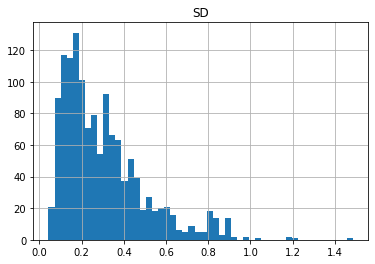

In [8]:
df_slope.hist(column='SD', bins = 50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1058277b8>]],
      dtype=object)

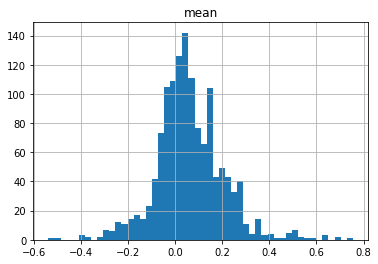

In [9]:
df_slope.hist(column='mean', bins = 50)

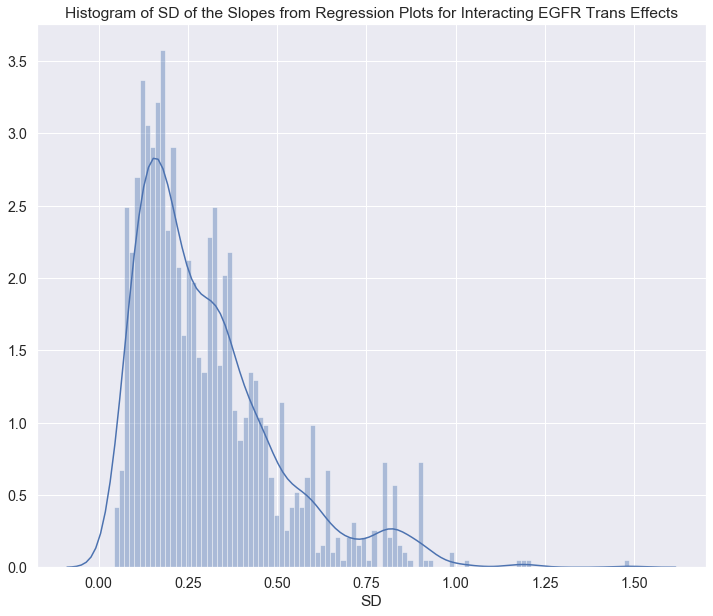

In [10]:
plt.rcParams["figure.figsize"] = (12,10)
sns.set(font_scale = 1.3)
a = sns.distplot(df_slope["SD"], bins = 100).set_title('Histogram of SD of the Slopes from Regression Plots for Interacting EGFR Trans Effects')

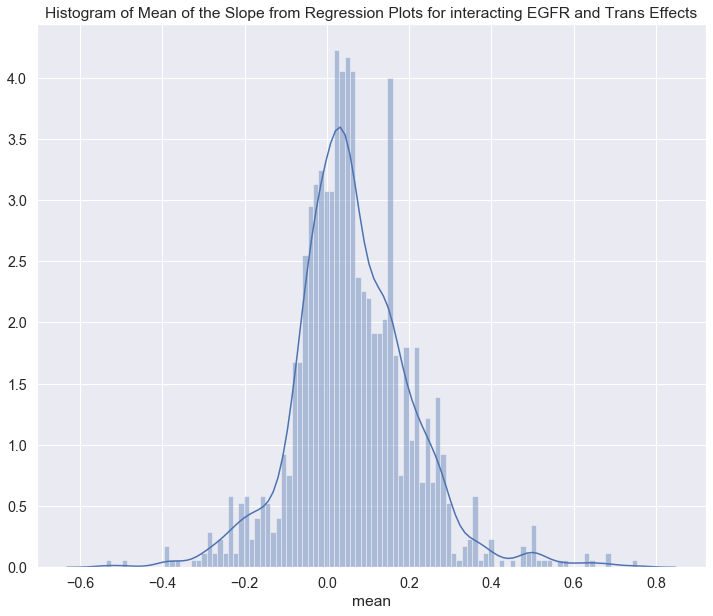

In [11]:
plt.rcParams["figure.figsize"] = (12,10)
sns.set(font_scale = 1.3)
a = sns.distplot(df_slope["mean"], bins = 100).set_title('Histogram of Mean of the Slope from Regression Plots for interacting EGFR and Trans Effects')

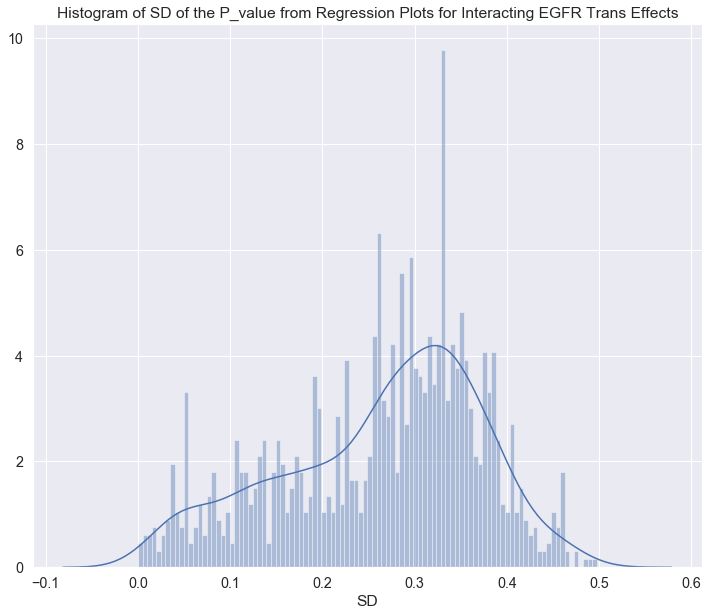

In [12]:
plt.rcParams["figure.figsize"] = (12,10)
sns.set(font_scale = 1.3)
a = sns.distplot(df_pvalue["SD"], bins = 100).set_title('Histogram of SD of the P_value from Regression Plots for Interacting EGFR Trans Effects')

In [13]:
df_other = pd.read_csv('pancan_EGFR_other.csv')
df_other = df_other.drop(['Unnamed: 0'], axis=1)
df_other

,Comparison,Slope_Gbm,R_squared_gbm,P_value_Gbm,Slope_kidney,R_squared_kidney,P_value_kidney,Slope_Endo,R_squared_Endo,P_value_Endo,...,P_value_Brca,Slope_Luad,R_squared_Luad,P_value_Luad,Slope_hnscc,R_squared_hnscc,P_value_hnscc,Slope_colon,R_squared_colon,P_value_colon
0,PHLDA1,0.536872,0.659114,9.317624e-27,0.189696,0.081886,5.235390e-05,0.304536,0.068441,0.001538,...,0.000190,0.236356,0.057995,0.001128,0.329068,0.217371,5.426160e-11,0.055226,1.808419e-03,7.407001e-01
1,SOCS2,0.290912,0.331202,5.912447e-11,-0.385206,0.599567,1.430341e-02,0.174235,0.019068,0.123080,...,NaN,NaN,NaN,NaN,0.022552,0.000824,8.121430e-01,NaN,NaN,NaN
2,GPRIN3,-0.196871,0.286043,2.089433e-09,-0.032602,0.005102,3.223231e-01,0.168797,0.048759,0.011583,...,0.262337,-0.136077,0.037954,0.004507,-0.145481,0.064261,2.510702e-03,0.183737,3.481000e-02,1.239463e-02
3,NFIA,0.234934,0.278873,3.609065e-09,0.241707,0.276612,3.410149e-15,0.052400,0.003222,0.499205,...,0.216394,NaN,NaN,NaN,-0.189774,0.080553,1.234413e-04,0.481289,1.874984e-01,5.423213e-10
4,MEOX2,0.293815,0.289387,1.114403e-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,-0.209414,0.171806,2.336687e-01,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18272,GPX6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.068721,7.938315e-04,9.426403e-01
18273,UGT2B15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033471,4.293094e-04,9.578051e-01
18274,ATP5G1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006282,9.149335e-06,9.663514e-01
18275,REG1B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005225,6.352281e-06,9.902506e-01


In [14]:
df_pvalue_other = df_other.loc[:,["Comparison","P_value_Gbm","P_value_kidney","P_value_Endo","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon"]]
df_pvalue_other= df_pvalue_other.dropna(thresh = 6)
df_pvalue_other["SD_other"] = (df_pvalue_other.loc[:,["Comparison","P_value_Gbm","P_value_kidney","P_value_Endo","P_value_Ovar","P_value_Brca","P_value_Luad","P_value_hnscc","P_value_colon"]].std(axis = 1))
df_pvalue_other.nlargest(10, 'SD_other')

#df_pvalue_other = df_other.loc[:,["Comparison","SD"]]
#df_pvalue = df_pvalue.loc[:,["Comparison","SD"]]
merged =  pd.concat([df_pvalue, df_pvalue_other], axis=1, sort=False)
merged

,Comparison,P_value_Gbm,P_value_kidney,P_value_Endo,P_value_Ovar,P_value_Brca,P_value_Luad,P_value_hnscc,P_value_colon,SD,Comparison,P_value_Gbm,P_value_kidney,P_value_Endo,P_value_Ovar,P_value_Brca,P_value_Luad,P_value_hnscc,P_value_colon,SD_other
0,GRB2,5.651892e-14,9.660917e-18,2.115855e-08,0.674800,0.057899,0.000007,1.112246e-05,7.473741e-06,0.236522,PHLDA1,9.317624e-27,5.235390e-05,0.001538,0.002761,0.000190,0.001128,5.426160e-11,7.407001e-01,0.261592
1,SOX9,5.382478e-09,2.405923e-03,2.296318e-01,0.442268,0.006389,NaN,3.570264e-02,1.067756e-04,0.171422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CDKN2C,8.399510e-08,2.460994e-33,7.108212e-01,0.000006,0.008360,NaN,2.130308e-07,2.897604e-15,0.268156,GPRIN3,2.089433e-09,3.223231e-01,0.011583,0.302755,0.262337,0.004507,2.510702e-03,1.239463e-02,0.150833
3,GAB1,3.690040e-07,3.084590e-10,8.917452e-01,0.000960,0.132903,NaN,1.267222e-04,1.789017e-10,0.332307,NFIA,3.609065e-09,3.410149e-15,0.499205,0.000112,0.216394,NaN,1.234413e-04,5.423213e-10,0.192713
4,DBI,4.209130e-07,2.362286e-15,6.552258e-05,0.289214,0.038234,NaN,1.103061e-06,3.558572e-02,0.106096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C15orf38-AP3S2,NaN,NaN,NaN,0.000359,0.419726,0.706253,7.296438e-06,2.572894e-11,0.324512
16839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CSRP3,NaN,NaN,NaN,0.000487,0.202607,0.016559,2.707548e-02,1.436547e-11,0.086432
16926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ADAMTS16,NaN,NaN,NaN,0.035795,0.623446,0.001318,4.644106e-01,8.260754e-01,0.362881
17068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MS4A1,NaN,NaN,NaN,0.536251,0.429546,0.000023,1.192425e-02,5.296476e-02,0.256198


Text(0.5, 0, 'pvalue')

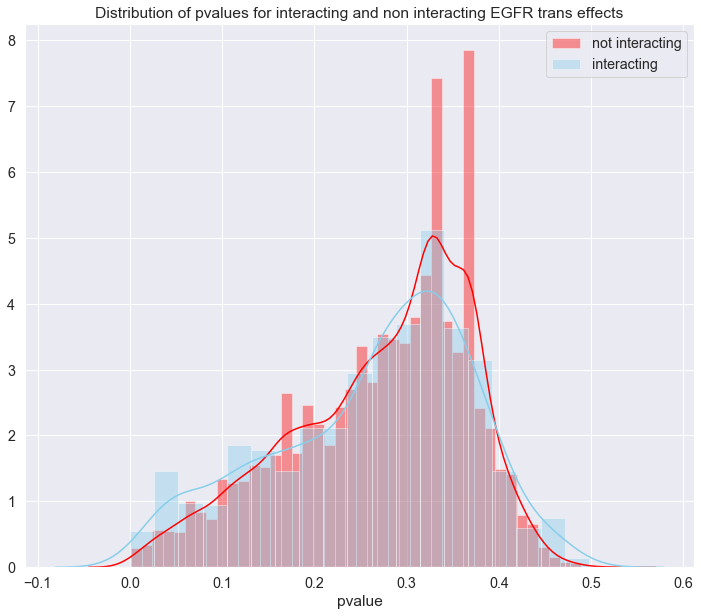

In [15]:
# Method 1: on the same Axis
sns.distplot( merged["SD_other"].dropna() , color="red", label="not interacting")
sns.distplot( merged["SD"].dropna() , color="skyblue", label="interacting")

plt.legend()

plt.title('Distribution of pvalues for interacting and non interacting EGFR trans effects')
plt.xlabel('pvalue')



In [22]:
df_slope_other = df_other.loc[:,["Comparison","Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc","Slope_colon"]]
df_slope_other= df_slope_other.dropna(thresh = 6)
df_slope_other["SD_other"] = (df_slope_other.loc[:,["Comparison","Slope_Gbm","Slope_kidney","Slope_Endo","Slope_Ovar","Slope_Brca","Slope_Luad","Slope_hnscc","Slope_colon"]].std(axis = 1))
df_slope_other.nlargest(10, 'SD_other')

#df_pvalue_other = df_other.loc[:,["Comparison","SD"]]
#df_pvalue = df_pvalue.loc[:,["Comparison","SD"]]
merged2 =  pd.concat([df_slope, df_slope_other], axis=1, sort=False)
merged2

,Comparison,Slope_Gbm,Slope_kidney,Slope_Endo,Slope_Ovar,Slope_Brca,Slope_Luad,Slope_hnscc,Slope_colon,SD,...,Comparison,Slope_Gbm,Slope_kidney,Slope_Endo,Slope_Ovar,Slope_Brca,Slope_Luad,Slope_hnscc,Slope_colon,SD_other
0,GRB2,-0.163726,0.195011,-0.259424,-0.028630,-0.103359,-0.132149,-0.085705,0.293565,0.186898,...,PHLDA1,0.536872,0.189696,0.304536,0.840646,0.363866,0.236356,0.329068,0.055226,0.240078
1,SOX9,0.248300,0.198859,0.146958,0.127774,0.281249,NaN,0.100961,-0.442788,0.245628,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CDKN2C,0.275173,0.506703,0.044002,0.748923,0.176449,NaN,-0.193515,0.847993,0.377751,...,GPRIN3,-0.196871,-0.032602,0.168797,0.131152,-0.063316,-0.136077,-0.145481,0.183737,0.152098
3,GAB1,0.142447,-0.175248,0.013304,0.485464,-0.077163,NaN,-0.148343,0.778368,0.358790,...,NFIA,0.234934,0.241707,0.052400,0.418724,-0.093636,NaN,-0.189774,0.481289,0.251864
4,DBI,0.181830,-0.648547,-0.252010,0.119505,0.159756,NaN,-0.216873,0.328938,0.340810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16835,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,C15orf38-AP3S2,NaN,NaN,NaN,0.287457,0.041328,-0.012153,-0.120804,0.424876,0.225026
16839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,CSRP3,NaN,NaN,NaN,0.832387,0.178556,-0.188958,-0.348485,1.884958,0.911386
16926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ADAMTS16,NaN,NaN,NaN,0.415245,0.117731,0.756418,0.241636,0.064897,0.279133
17068,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,MS4A1,NaN,NaN,NaN,-0.417125,0.112781,-0.486577,-0.276142,0.817138,0.537342


Text(0.5, 0, 'pvalue')

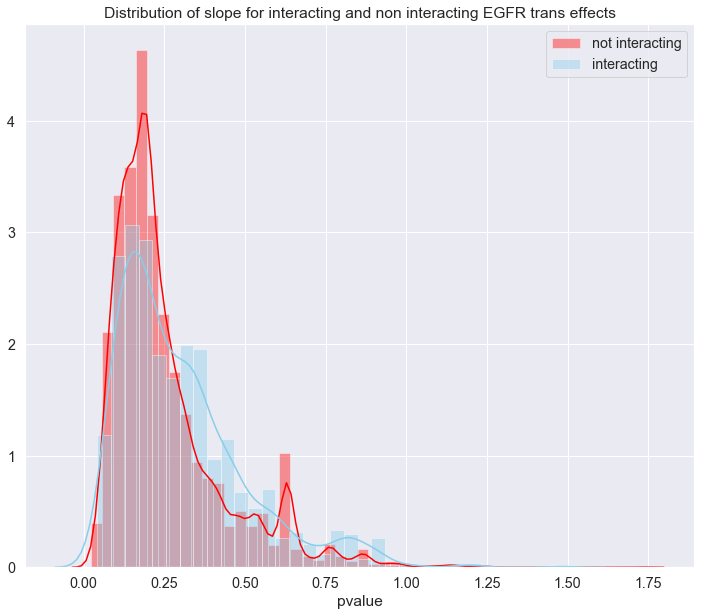

In [23]:
# Method 1: on the same Axis
sns.distplot( merged2["SD_other"].dropna() , color="red", label="not interacting")
sns.distplot( merged2["SD"].dropna() , color="skyblue", label="interacting")

plt.legend()

plt.title('Distribution of slope for interacting and non interacting EGFR trans effects')
plt.xlabel('pvalue')